# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [114]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
merge_df = pd.merge(mouse_metadata, study_results, on="Mouse ID")

# Display the data table for preview
merge_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [24]:
# Checking the number of mice.


n = merge_df['Mouse ID'].nunique()
print(f"The number of unique mouse IDs: ", n )

The number of unique mouse IDs:  249


In [25]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

dup_mouse_id = merge_df[merge_df.duplicated(['Mouse ID', 'Timepoint'])]['Mouse ID'].unique()
if len(dup_mouse_id) > 0:
    print("Mouse_IDs with duplicate timepoints: ")
for mouse_id in dup_mouse_id:
    print(f"Mouse ID:  {mouse_id}")
    print(merge_df[merge_df['Mouse ID'] == mouse_id])



Mouse_IDs with duplicate timepoints: 
Mouse ID:  g989
    Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
908     g989     Propriva  Female          21          26          0   
909     g989     Propriva  Female          21          26          0   
910     g989     Propriva  Female          21          26          5   
911     g989     Propriva  Female          21          26          5   
912     g989     Propriva  Female          21          26         10   
913     g989     Propriva  Female          21          26         10   
914     g989     Propriva  Female          21          26         15   
915     g989     Propriva  Female          21          26         15   
916     g989     Propriva  Female          21          26         20   
917     g989     Propriva  Female          21          26         20   
918     g989     Propriva  Female          21          26         25   
919     g989     Propriva  Female          21          26         30   
920     g9

In [26]:
# Optional: Get all the data for the duplicate mouse ID. 


In [33]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleaned_df = merge_df[~merge_df['Mouse ID'].isin(dup_mouse_id)]
cleaned_df


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [34]:
# Checking the number of mice in the clean DataFrame.
updated_unique_mouse_ids = cleaned_df['Drug Regimen'].nunique()
print(f"The updated number of mice in the clean DataFrame is: {updated_unique_mouse_ids}")

The updated number of mice in the clean DataFrame is: 10


## Summary Statistics

In [39]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

regimen_data = cleaned_df.groupby('Drug Regimen')
summary_stats = regimen_data['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem'])
print(summary_stats)

tumor_sum_stats = pd.DataFrame(summary_stats)


                   mean     median        var       std       sem
Drug Regimen                                                     
Capomulin     40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin      52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol     52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril      55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol      54.331565  52.509285  66.173479  8.134708  0.596466
Placebo       54.033581  52.288934  61.168083  7.821003  0.581331
Propriva      52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane      40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn      54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol     53.236507  51.818479  48.533355  6.966589  0.516398


In [ ]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line


## Bar and Pie Charts

Text(0, 0.5, 'Count')

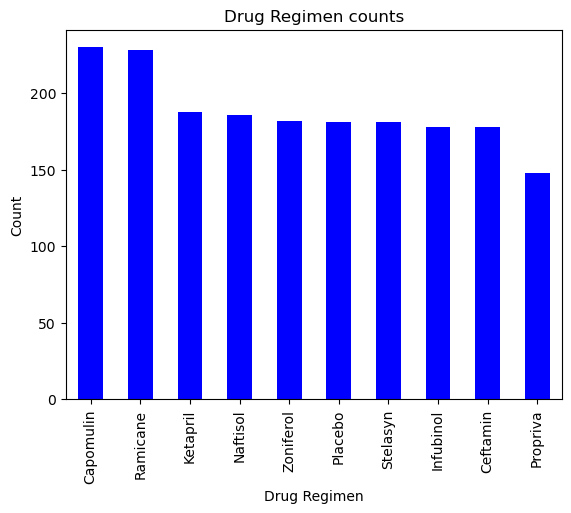

In [58]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
pd_drug_regimen_counts = cleaned_df['Drug Regimen'].value_counts()
pd_bar_chart = pd_drug_regimen_counts.plot(y='Timepoints', x='Drug Regimen', kind='bar', color='blue', title='Drug Regimen counts')
pd_bar_chart.set_xlabel('Drug Regimen')
pd_bar_chart.set_ylabel('Count')

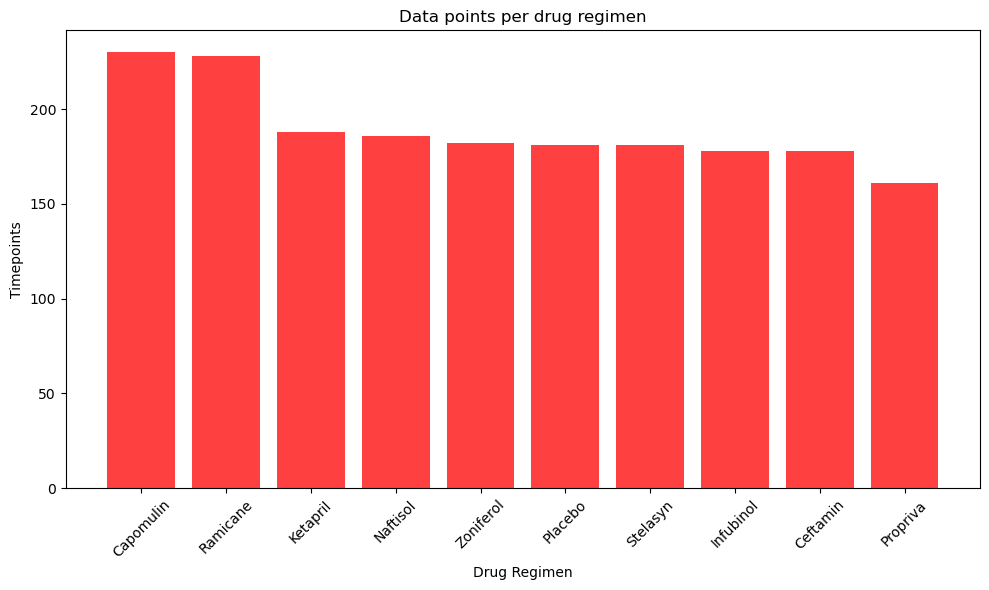

In [47]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
plt.figure(figsize=(10,6))
plt.bar(pd_drug_regimen_counts.index, pd_drug_regimen_counts, color='red', alpha=0.75)
plt.xlabel('Drug Regimen')
plt.ylabel('Timepoints')
plt.title('Data points per drug regimen')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [65]:
percent = merge_df["Mouse ID"].groupby(merge_df["Sex"]).nunique()
percent


Sex
Female    124
Male      125
Name: Mouse ID, dtype: int64

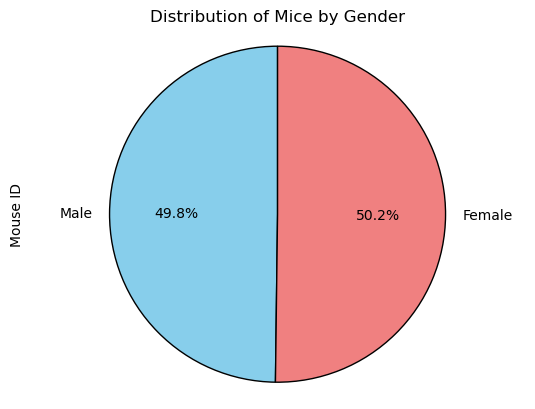

In [80]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
gender_counts = merge_df['Mouse ID'].groupby(merge_df['Sex']).nunique()

gender_counts.plot(kind='pie', autopct='%1.1f%%', colors=['skyblue', 'lightcoral'], labels=['Male', 'Female'],
                  startangle=90, wedgeprops={'edgecolor': 'black'})


plt.title('Distribution of Mice by Gender')

plt.axis('equal')
plt.show()

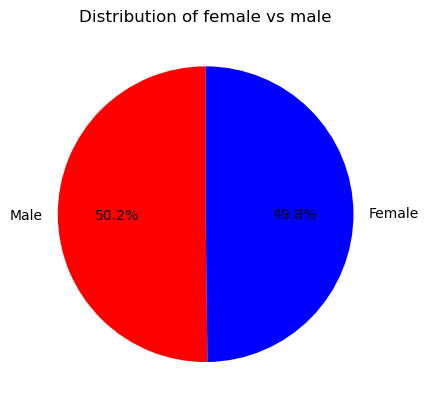

In [83]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = ['Male', 'Female']
sizes = [125, 124]
colors = ['red', 'blue']

plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.title("Distribution of female vs male")
plt.show()

## Quartiles, Outliers and Boxplots

In [86]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
last_timepoints = merge_df.groupby('Mouse ID')['Timepoint'].max()
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
final_tumor_vol = pd.merge(merge_df, last_timepoints, on=['Mouse ID', 'Timepoint'])
specific_regimens = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
final_tumor_vol = final_tumor_vol[final_tumor_vol['Drug Regimen'].isin(specific_regimens)]





In [92]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []

for regimen in specific_regimens:
    tumor_volume = final_tumor_vol[final_tumor_vol['Drug Regimen'] == regimen]['Tumor Volume (mm3)']

tumor_vol_data.append(tumor_volume)

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
quartiles = tumor_volume.quantile([0.25, 0.75])
Q1 = quartiles[0.25]
Q3 = quartiles[0.75]
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 -1.5 * IQR

outliers = tumor_volume[tumor_volume < lower_bound] | (tumor_volume > upper_bound)

print(f"Regimen: {regimen}")
print(f"IQR: {IQR}")
print(f"Lower Bound: {lower_bound}")
print(f"Upper Bound: {upper_bound}")
print(f"Outliers: {outliers}")


    
    # Locate the rows which contain mice on each drug and get the tumor volumes

    
    # add subset 

    
    # Determine outliers using upper and lower bounds


Regimen: Ceftamin
IQR: 15.577752179999997
Lower Bound: 25.355449580000002
Upper Bound: 40.93320176
Outliers: 52     False
65     False
66     False
68     False
97     False
111    False
118    False
122    False
133    False
134    False
135    False
136    False
139    False
155    False
171    False
175    False
195    False
199    False
200    False
216    False
228    False
232    False
235    False
241    False
242    False
Name: Tumor Volume (mm3), dtype: bool


Text(0, 0.5, 'Tumor Volume (mm3)')

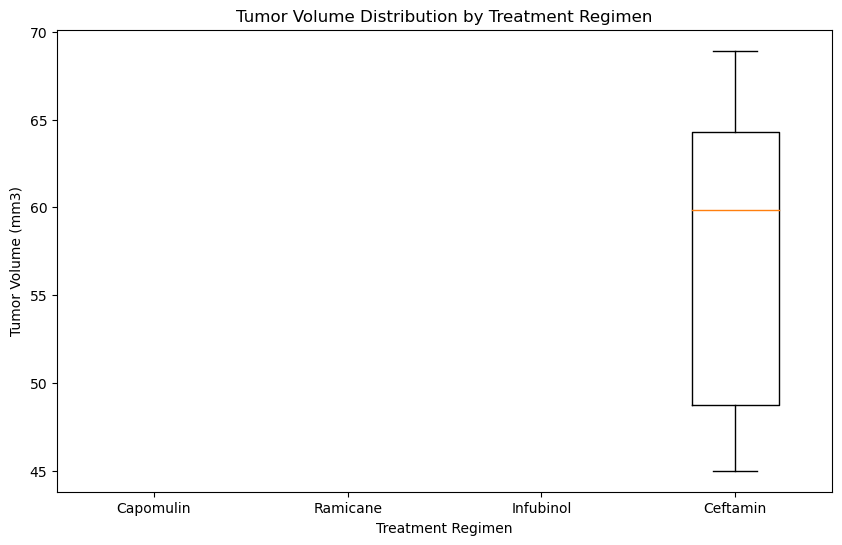

In [103]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
tumor_vol_dict = {regimen: [] for regimen in specific_regimens}
for regimen in specific_regimens:
    tumor_volumes = final_tumor_vol[final_tumor_vol['Drug Regimen'] == regimen]['Tumor Volume (mm3)']
tumor_vol_dict[regimen] = tumor_volumes
data_to_plot = [tumor_vol_dict[regimen] for regimen in specific_regimens]


plt.figure(figsize=(10, 6))
plt.boxplot(data_to_plot, labels=specific_regimens, flierprops={'marker': 'o', 'markerfacecolor': 'red'})
plt.title('Tumor Volume Distribution by Treatment Regimen')
plt.xlabel('Treatment Regimen')
plt.ylabel('Tumor Volume (mm3)')


## Line and Scatter Plots

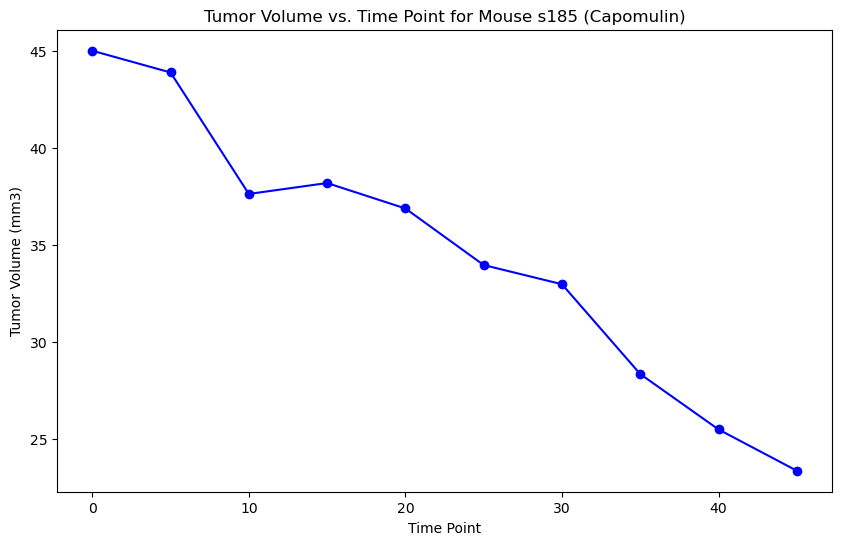

In [110]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin

mouse_id = 's185'
capomulin_data = merge_df[(merge_df['Mouse ID'] == mouse_id) & (merge_df['Drug Regimen'] == 'Capomulin')]
plt.figure(figsize=(10, 6))
plt.plot(capomulin_data['Timepoint'], capomulin_data['Tumor Volume (mm3)'], marker='o', color='blue')
plt.title(f'Tumor Volume vs. Time Point for Mouse {mouse_id} (Capomulin)')
plt.xlabel('Time Point')
plt.ylabel('Tumor Volume (mm3)')

plt.show()

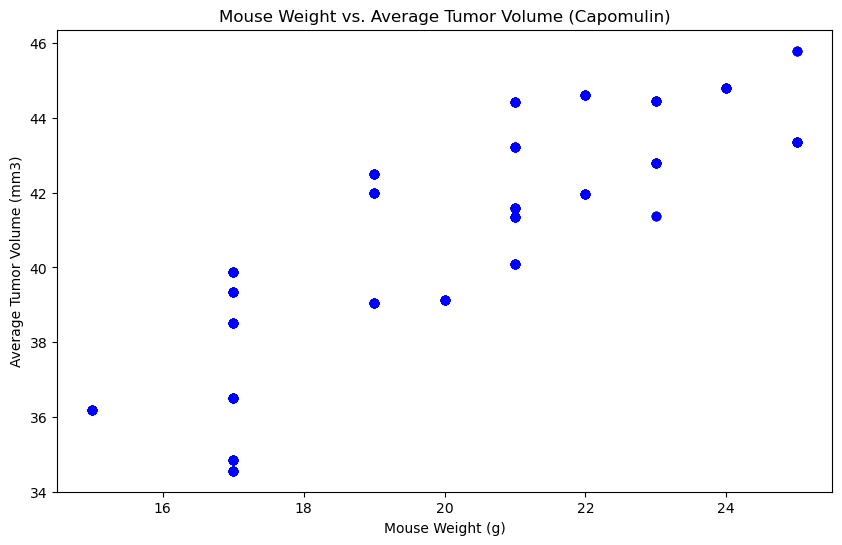

In [113]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
average_tumor_volume = merge_df.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()
capomulin_data = merge_df[merge_df['Drug Regimen'] == 'Capomulin']

plt.figure(figsize=(10, 6))
plt.scatter(capomulin_data['Weight (g)'], average_tumor_volume[capomulin_data['Mouse ID']], color='blue')
plt.title('Mouse Weight vs. Average Tumor Volume (Capomulin)')
plt.xlabel('Mouse Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()


## Correlation and Regression

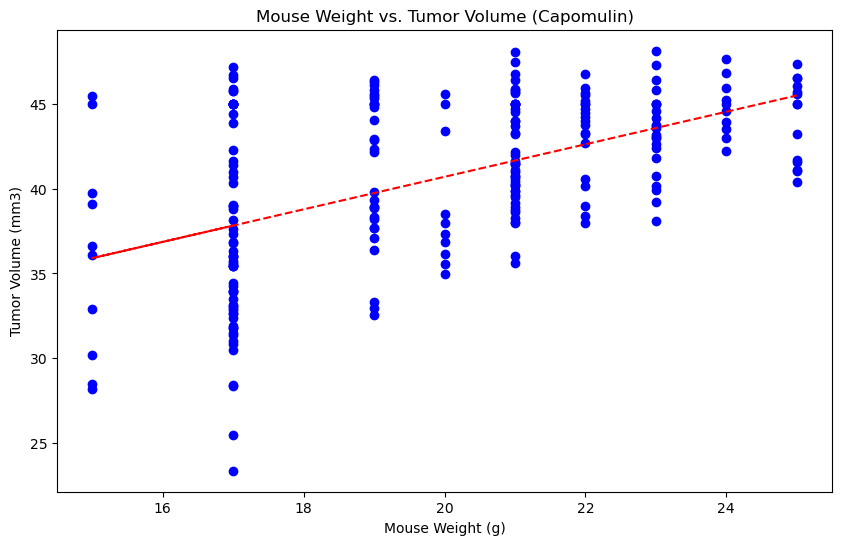

In [116]:
# Calculate the correlation coefficient and a linear regression model 
correlation = np.corrcoef(capomulin_data['Weight (g)'], capomulin_data['Tumor Volume (mm3)'])[0, 1]
slope, intercept, r_value, p_value, std_err = linregress(capomulin_data['Weight (g)'], capomulin_data['Tumor Volume (mm3)'])

plt.figure(figsize=(10, 6))
plt.scatter(capomulin_data['Weight (g)'], capomulin_data['Tumor Volume (mm3)'], color='blue')
plt.title('Mouse Weight vs. Tumor Volume (Capomulin)')
plt.xlabel('Mouse Weight (g)')
plt.ylabel('Tumor Volume (mm3)')

regress_line = slope * capomulin_data['Weight (g)'] + intercept
plt.plot(capomulin_data['Weight (g)'], regress_line, color='red', linestyle='--')

plt.show()
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
